In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [82]:
#loading the Sample Image and the MASK
image_path = r'C:\Users\abdul\Desktop\DIP Project\Total Data\Images\camourflage_00012.jpg'
mask_path = r'C:\Users\abdul\Desktop\DIP Project\Total Data\Masks\camourflage_00012.png'

img = cv2.imread(image_path)
mask = cv2.imread(mask_path)

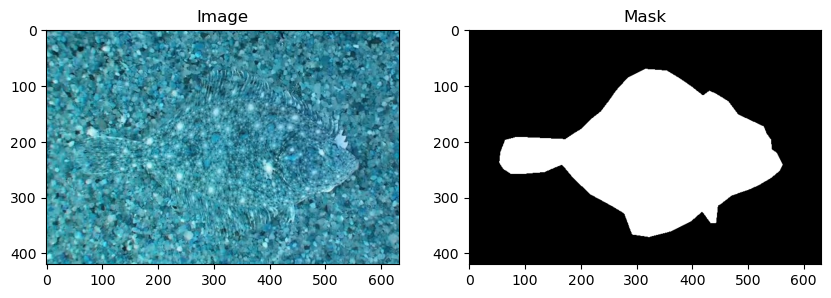

In [83]:
# Create a figure with three subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot each image on a different subplot
axs[0].imshow(img)
axs[0].set_title('Image')
axs[1].imshow(mask)
axs[1].set_title('Mask')

plt.show()

## Morphological Operation to Apply Mask on Original Image

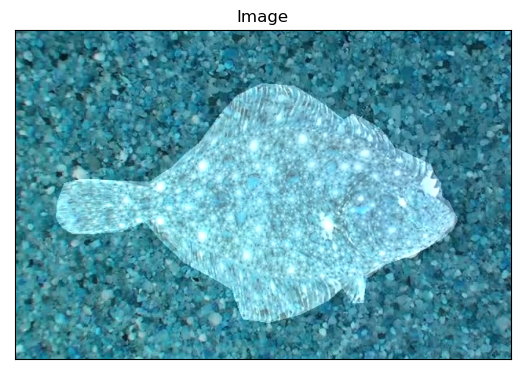

In [84]:
mask = cv2.imread(mask_path,0)
# Apply morphological dilation to the mask to make the highlighted area thicker
kernel = np.ones((5, 5), np.uint8)
dilation = cv2.dilate(mask, kernel, iterations=1)

# Use the mask to create a binary mask
ret, binary_mask = cv2.threshold(dilation, 1, 255, cv2.THRESH_BINARY)

# Convert the binary mask to color
color_mask = cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR)

# Blend the original image and the color mask together
highlighted_img = cv2.addWeighted(img, 0.9, color_mask, 0.3, 0)


plt.subplot(1,1,1),plt.imshow(highlighted_img,cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.show()

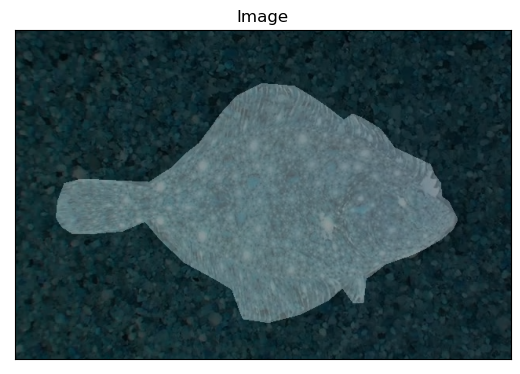

In [85]:
# Apply contrast stretching using OpenCV's equalizeHist function
highlighted_img = cv2.addWeighted(img, 0.3, color_mask, 0.3, 0)


plt.subplot(1,1,1),plt.imshow(highlighted_img,cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Apply Contrast Stretching on Highlighted Image

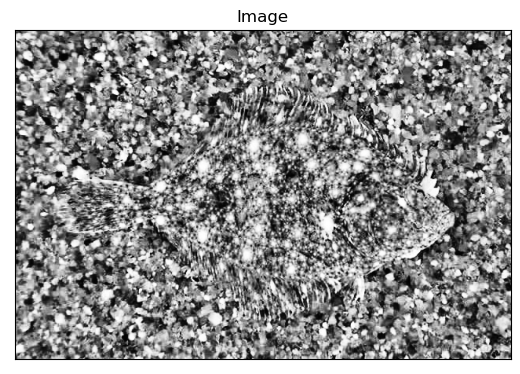

In [86]:
# Apply contrast stretching using OpenCV's equalizeHist function

### On a Simple Image

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
stretched_img = clahe.apply(gray_img)

plt.subplot(1,1,1),plt.imshow(stretched_img,cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.show()

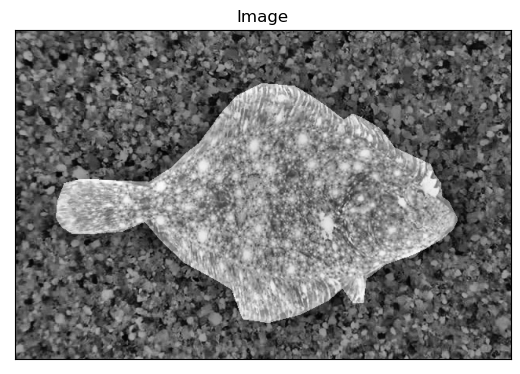

In [87]:
### Highlighted Image

gray_img = cv2.cvtColor(highlighted_img, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
stretched_img = clahe.apply(gray_img)

plt.subplot(1,1,1),plt.imshow(stretched_img,cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Applying Top-HAT Operation

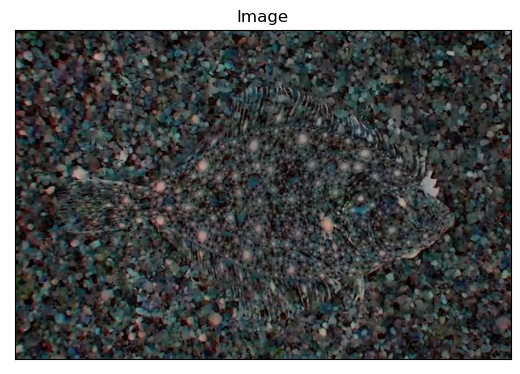

In [88]:
### On a Simple Image

# Define a rectangular kernel for the top hat operation
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,25))

# Perform the top hat operation
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

plt.subplot(1,1,1),plt.imshow(tophat,cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.show()

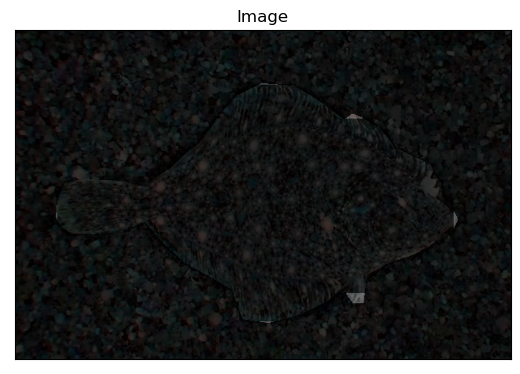

In [89]:
### On a Highlighted Image
# Define a rectangular kernel for the top hat operation
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,25))

# Perform the top hat operation
tophat = cv2.morphologyEx(highlighted_img, cv2.MORPH_TOPHAT, kernel)

plt.subplot(1,1,1),plt.imshow(tophat,cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Applying Black-HAT

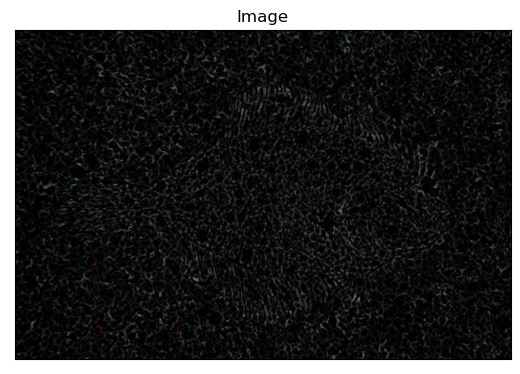

In [90]:

## On the Original Image

# Define the kernel size for the operation
kernel_size = (5,5)

# Create a rectangular kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

# Apply the black hat operation
black_hat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

plt.subplot(1,1,1),plt.imshow(black_hat,cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.show()

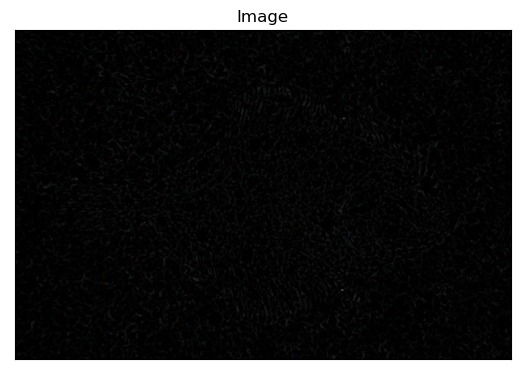

In [91]:
## On the highlighted Image

# Define the kernel size for the operation
kernel_size = (5,5)

# Create a rectangular kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

# Apply the black hat operation
black_hat = cv2.morphologyEx(highlighted_img, cv2.MORPH_BLACKHAT, kernel)

plt.subplot(1,1,1),plt.imshow(black_hat,cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.show()